# Robotics 102 Project 4, Part 1: Nearest Neighbors

This notebook is part of [Robotics 102 Project 4](https://robotics102.github.io/projects/a4.html). In it, you will implement the Nearest Neighbors machine learning algorithm in Python.

This part of the project is completed individually. Before submitting the assignment, make sure to run all the cells.

To start, edit the cell below by adding your name.

**Your Name:**


## Imports
Some imports we'll need. Run this cell first.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

ModuleNotFoundError: No module named 'numpy'

## Helper Functions.

This function helps visualize images. Run this cell before you start.

In [ ]:
def make_image_grid(imgs, nrows=1, border_size=2):
    N, H, W = imgs.shape
    ncols = int(np.ceil(N / nrows))
    pad = border_size // 2
    imgs = (imgs * 255 / imgs.max()).astype(np.uint8)
    padded = np.pad(imgs, ((0, 0), (pad, pad), (pad, pad)), 'constant', constant_values=255)
    if N < ncols * nrows:
        _, H, W = padded.shape
        padded = np.concatenate((padded, np.zeros((ncols * nrows - N, H, W), dtype=padded.dtype)))
    grid = np.vstack([np.hstack(padded[r * ncols:(r + 1) * ncols]) for r in range(nrows)])

    return grid

## The MNIST Data

MNIST contains 60,000 train images and 10,000 test images. We will use a smaller subset of the dataset with `N_train` training images and `N_test` test images, because testing on the full dataset will take too long. You can modify these numbers when testing your algorithm.

The images which we will use in this project are stored in matrices, `x_train` and `x_test`. These are 3 dimensional matrices, of shape `(N, W, H)`. You can think of these matrices as a _list_ of images of size `(W, H)`, with `H` rows and `W` columns.

This data loading cell does some processing on the data to prepare it for use in this assignment. It initializes a few variables that you can use in later cells:
* `N_train` and `N_test`: The number of testing and training images
* `width`, `height`, and `DIM`: The width, height, and total number of pixels in the images (note `DIM = width * height`).
* `num_classes`: The number of classes in the dataset (10)
* `x_train`: The training images, with shape `(N_train, 28, 28)`
* `y_train`: The training labels, a vector of length `N_train`
* `x_test`: The testing images, with shape `(N_test, 28, 28)`
* `y_test`: The testing labels, a vector of length `N_test`

Each pixel value in the images is a float between 0 and 1. The variables `y_train` and `y_test` contain integers corresponding to the labels for each of the images, between 0 and 9.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (1000, 28, 28)
Training labels shape: (1000,)
Testing data shape: (50, 28, 28)
Testing labels shape: (50,)


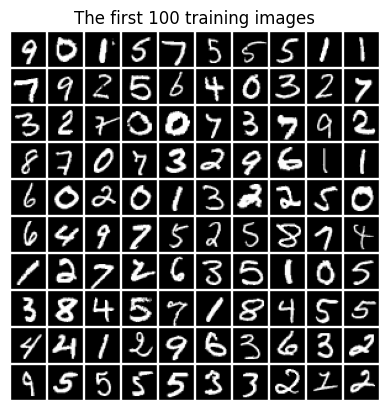

In [ ]:
# Number of test and train samples to use in this notebook.
# TODO: Once your algorithm is implemented, come back to this cell and change
# these numbers. They cannot be higher than N_train_full and N_test_full.
N_train = 1000
N_test = 50

# Number of test and train samples available in MNIST
num_classes = 10

# Load dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to values from 0 to 1.
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

# Grab the height and the width from the data.
N_train_full, width, height = x_train.shape
N_test_full, = y_test.shape
DIM = width * height

# Load subset (to cut down on computation time)
train_index = np.random.choice(np.arange(N_train_full), N_train)
test_index = np.random.choice(np.arange(N_test_full), N_test)

x_train = x_train[train_index, :, :]
y_train = y_train[train_index]
x_test = x_test[test_index, :, :]
y_test = y_test[test_index]

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

# Visualize the first 100 training images.
img_grid = make_image_grid(x_train[:100], nrows=10)
plt.imshow(img_grid, cmap=plt.get_cmap('gray'))
plt.title("The first 100 training images")
plt.axis('off');  # Adding a semi-colon after the last line stops a print.

To access a single image, we can index into the first dimension, and select all the pixels in the last two dimensions. We can index into the label like a regular vector. For example, to get the first training image and its label, we can use the code in the following cell.

The first image has shape: (28, 28)
The first image has label: 9


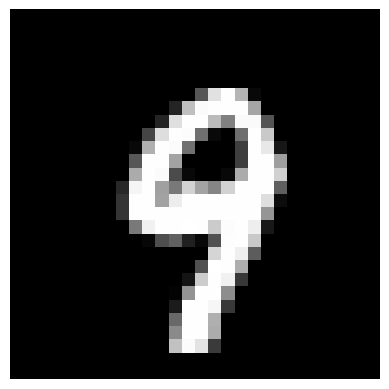

In [ ]:
# Get the first image and its label.
img = x_train[0, :, :]
label = y_train[0]

print("The first image has shape:", img.shape)

print("The first image has label:", label)
# Display the image.
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off');

## Distance function

The nearest neighbors algorithm requires a measure of distance between two images. We will use the $N$-dimensional Euclidean distance. Given two vectors of length $N$, $\textbf{u}$ and $\textbf{v}$, the Euclidean distance between them is:

$$d(\textbf{u}, \textbf{v}) = \sqrt{(u_1 - v_1)^2 + (u_2 - v_2)^2 + \dots (u_N - v_N)^2}$$

For matrices, the same function applies, but we will sum the squares of the distances between each pixel.

Complete the function `compute_distances()` such that it accepts an image, `X`, and a matrix of `N` images, `X_train`, and returns a vector of length `N` containing the Euclidean distance from `X` to each image in `X_train`.

*Hint:* You can do this using multiple Python `for` loops, but it will take a very long time! You can do this with just one `for` loop using NumPy's batch computation features, like in the in-class activity. It is also possible to do it with no `for` loops!

In [ ]:
"""
    compute_distances(X, X_train)

Compute Euclidean distances between an image and multiple training images.

# Arguments
- X: The image data, with shape (W, H).
- X_train: The training images, with shape (N_train, W, H).

# Outputs
- dists: An array of the distances between an image and each image in X_train,
         of length (N_train,).
"""
def compute_distances(X, X_train):
    N, H, W = X_train.shape
    dists = np.zeros(N)

    # TODO: Compute the distance from `X` to each image in `X_train` and store
    # the result in `dists`.

    return dists

## Nearest Neighbors

The function `nearest_neighbor()` should use the `compute_distances()` function to get the distances from image `X` to each image in `X_train`. Then, it should return the _index_ of the image in `X_train` with the _smallest_ distance to `X`. (_Hint_: Consider the NumPy function [argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html).)

In [ ]:
"""
    nearest_neighbor(X, X_train)

Compute the index of X's nearest neighbor in X_train.

# Arguments
- X: The image data, with shape (W, H).
- X_train: The training images, with shape (N_train, W, H).

# Output
- min_img_idx: The index of the training image with the minimum distance to the
               given image, a single integer number
"""
def nearest_neighbor(X, X_train):
    min_img_idx = None

    # TODO: Find the index of the nearest neighbor of `X` in `X_train` and
    # store it in `min_img_idx`.

    return min_img_idx

### Test the distance and neighbor functions

This data is small enough that you can deduce the correct answers through observation to make sure your functions return the right thing. Feel free to modify these to test more cases.

For example, this block of code creates 2x2 matrix `mini_x = [1 2; 3 4]`, and matrix `mini_x_train` with shape `(3, 2, 2)`, containing matrices `[2 2; 3 3]`, `[1 1; 3 4]` and `[1 2; 3 4]`.

The distances from `mini_x` to each `mini_x_train` should be `[sqrt(2), 1.0, 0]`. The nearest neighbor index for `mini_x` in `mini_x_train` is 2.

In [ ]:
# Some tests to make sure the functions are correct.
mini_x = np.arange(1, 5).reshape(2, 2)
mini_x_train = np.array([[[2, 2], [3, 3]],
                         [[1, 1], [3, 4]],
                         [[1, 2], [3, 4]]])
dists = compute_distances(mini_x, mini_x_train)

print("Test image:\n", mini_x)
for i in range(mini_x_train.shape[0]):
    print("Train image {}:\n".format(i), mini_x_train[i])

print("Distances:", dists)

# Test nearest neighbors for one test image.
nearest = nearest_neighbor(mini_x, mini_x_train)
print("Nearest neighbor:", nearest)

Test image:
 [[1 2]
 [3 4]]
Train image 0:
 [[2 2]
 [3 3]]
Train image 1:
 [[1 1]
 [3 4]]
Train image 2:
 [[1 2]
 [3 4]]
Distances: [0. 0. 0.]
Nearest neighbor: None


Let's visualize some images and their nearest neighbors.

In [ ]:
num_viz = 10

# Pick num_viz random images without replacement.
idx = np.random.choice(np.arange(N_test), num_viz)
vis_images = x_test[idx, :, :]

# Find the nearest neighbors.
nearest = [nearest_neighbor(vis_images[i], x_train) for i in range(num_viz)]
nearest_imgs = x_train[nearest, :, :]

# Visualize.
print("Top row = test image, bottom row = nearest neighbor.")
img_grid = make_image_grid(np.concatenate((vis_images, nearest_imgs)), nrows=2)
plt.imshow(img_grid, cmap=plt.get_cmap('gray'))
plt.axis('off');

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Predict Nearest Neighbor Labels

The `predict_nn_labels()` function should use the `nearest_neighbors()` function to find the nearest neighbors in `X_train` for each image in `X_test`. Then, it should assign the label of the nearest neighbor as the predicted label for each test image.

In [ ]:
"""
    predict_nn_labels(X_test, X_train, y_train)

Predict nearest neighbor labels for X_test.

# Arguments
- X_test: The test images, with shape (N_test, D).
- X_train: The training images, with shape (N_train, D).
- y_train: The training labels, with shape (N_train,).

# Outputs
- labels: An array of predicted label for each testing image, with length N_test
"""
def predict_nn_labels(X_test, X_train, y_train):
    N_test, _, _ = X_test.shape
    labels = np.zeros(N_test, dtype=int)

    # TODO: Find the label for each image `X_test` using Nearest Neighbors on
    # the data `X_train` with labels `y_train` and store the result in `labels`.

    return labels

### Test prediction function

Similar to the tests for the neighbors and distance functions, these values can be changed to make sure the prediction is correct. For example, for the three training images given, with three labels:
```julia
mini_y = [17, 12, 2]
```
the first test "image" is closest to train index 0, meaning it should have label 17. The second image is closest to train image 2 so should have label 2. The value of `mini_y_pred` would be `[17, 2]`.

In [ ]:
# Some tests to make sure the prediction function is correct.
mini_y = np.array([17, 12, 2])
mini_x_test = np.array([[[1, 2], [3, 3]],
                        [[1, 2], [3, 5]]])

mini_y_pred = predict_nn_labels(mini_x_test, mini_x_train, mini_y)
print("Predicted values:", mini_y_pred)

## Test Nearest Neighbors

To test the algorithm, we will use _accuracy_. Accuracy measures the percentage of predicted values which match the true value.

First, complete the function below so that it returns the accuracy for predicted labels `y_pred` given the true labels, `y_true`.

In [ ]:
def accuracy(y_pred, y_true):
    N, = y_pred.shape
    acc = None

    # TODO: Compute the accuracy for the predicted labels given the true labels.
    return acc

Now, we will measure the accuracy on all the testing data.

Try changing `N_train` and `N_test`. Does changing `N_train` affect the results?

*Note:* This might take a while if you increase the size of `N_train` and `N_test`.

In [ ]:
y_pred = predict_nn_labels(x_test, x_train, y_train)
acc = accuracy(y_pred, y_test)
print("\nAccuracy:", acc)

## Visualize some results

In [ ]:
num_viz = 10

idx = np.random.choice(np.arange(N_test), num_viz, replace=False)
nearest = [nearest_neighbor(x_test[i], x_train) for i in idx]
nearest_imgs = x_train[nearest, :, :]
imgs = x_test[idx, :, :]

for i in range(0, num_viz):
    img = idx[i]
    print("Img", i, "-> Predicted:", y_pred[img], "True:", y_test[img])

print("\nTop row = test image, bottom row = nearest neighbor.")
img_grid = make_image_grid(np.concatenate((imgs, nearest_imgs)), nrows=2)
plt.imshow(img_grid, cmap=plt.get_cmap('gray'))
plt.axis('off');

Congratulations! You just implemented a machine learning algorithm for image classification. How did you do? What happens to the accuracy when you change the number of training images, `N_train`? (Remember to rerun the necessary cells when you change the values).